<a href="https://colab.research.google.com/github/pacificblue/Data-Science-Hands-on-Projects/blob/main/Reviews_Classification_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Unbalanced Dataset: 
Either using down-sampling of the major class or adjusting the category_threshhold. Here the second method is used.

### Hyperparameter fine-tuning and Grid-Search: 
did manually here but can be automated, reference this solution: https://medium.com/ml-book/neural-networks-hyperparameter-tuning-in-tensorflow-2-0-a7b4e2b574a1

Hyperparameters in this project:

//Vocabulary size:

MAX_VOCAB_SIZE = 20000

//Embedding dimensionality:

D = 30

//Hidden state dimensionality:

M = 10

//Dropout rate

dropout_rate = 0.5

//Optimizer

optimizer='adam'

//Category_threthold

category_threthold = 0.5

### Size of Training dataset:
Here only used 10% of all data to save the train time.




In [ ]:
# Install TensorFlow
# !pip install -q tensorflow-gpu==2.0.0-beta1

try:
  %tensorflow_version 2.x  # Colab only.
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # Colab only.`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.
2.4.1


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D, GRU, SimpleRNN, Embedding, Dropout
from tensorflow.keras.models import Model

In [ ]:
!head review_data_with_labels.csv

review,label
"I had to click one star--that's all it's worth.  This item is a definite knock off--I brought it to Sephora where I always purchase my They're Real Mascara, and the sales person agreed it was definitely not the same mascara.  I wouldn't use anything on my eyes that is questionable, at best, so I'm throwing this out and contacting the seller requesting a refund.",0
"I tried to use this to take foundation with me during travel.  I thought it would be so much more hygienic than a little pot container and smaller than taking a full bottle.  While it was easy to fill, nothing would be dispensed!  I do not use a thick foundation - it is liquid.  Nothing would come out of the bottle and you can't re-open it to even try to get the foundation back.  Disappointed.",0
"This plate is a cheap knockoff. It took forever to arrive (came from China apparently, so that explains it). When I got it, I was so excited but started to get concerned when I looked at it more closely. The design pl

In [ ]:
df = pd.read_csv("review_data_with_labels.csv", encoding='latin-1')

In [ ]:
df.tail()

,review,label
241994,Some reviews said it didn't feel oily? Invisib...,0
241995,It is very hard to keep on. I have tried about...,0
241996,If it had been made 2 years later it would hav...,1
241997,I have been using a friends old Gillette doubl...,0
241998,No good.. I try this facial massager and it's ...,0


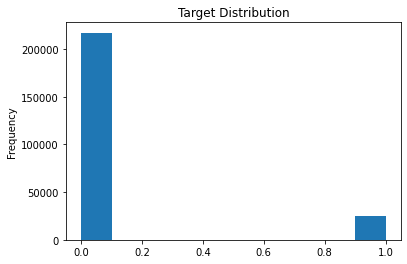

In [ ]:
df.label.plot(kind="hist", title="Target Distribution")

In [ ]:
# split up the data
df_train, df_remain, Ytrain, Yremain = train_test_split(df['review'], df['label'], train_size=0.1, random_state=42, stratify=df.label.values)
df_test, _, Ytest, _ = train_test_split(df_remain, Yremain, train_size=0.05, random_state=42, stratify=Yremain.values)
df_train.shape, Ytrain.shape, df_test.shape, Ytest.shape

((24199,), (24199,), (10890,), (10890,))

In [ ]:
# Convert sentences to sequences
MAX_VOCAB_SIZE = 20000
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(df_train)
sequences_train = tokenizer.texts_to_sequences(df_train)
sequences_test = tokenizer.texts_to_sequences(df_test)

In [ ]:
sequences_train[0]

[4,
 108,
 382,
 10494,
 4,
 289,
 490,
 31,
 30,
 24,
 2,
 787,
 4,
 200,
 21,
 4,
 16,
 363,
 14,
 328,
 1059,
 34,
 191,
 10,
 4,
 2,
 301,
 26,
 2,
 16,
 163,
 2454,
 5165]

In [ ]:
# get word -> integer mapping
word2idx = tokenizer.word_index
V = len(word2idx)
print('Found %s unique tokens.' % V)

Found 54252 unique tokens.


In [ ]:
# pad sequences so that we get a N x T matrix
data_train = pad_sequences(sequences_train)
print('Shape of data train tensor:', data_train.shape)

# get sequence length
T = data_train.shape[1]

Shape of data train tensor: (24199, 3382)


In [ ]:
word2idx

{'the': 1,
 'i': 2,
 'and': 3,
 'it': 4,
 'to': 5,
 'a': 6,
 'of': 7,
 'this': 8,
 'is': 9,
 'in': 10,
 'br': 11,
 'that': 12,
 'for': 13,
 'my': 14,
 'not': 15,
 'was': 16,
 'but': 17,
 'on': 18,
 'with': 19,
 'have': 20,
 'as': 21,
 'you': 22,
 'product': 23,
 'so': 24,
 'be': 25,
 'like': 26,
 'one': 27,
 'are': 28,
 'they': 29,
 'all': 30,
 'at': 31,
 'hair': 32,
 'if': 33,
 'from': 34,
 'very': 35,
 'just': 36,
 'had': 37,
 'out': 38,
 'would': 39,
 'or': 40,
 'me': 41,
 'when': 42,
 'no': 43,
 'an': 44,
 "it's": 45,
 'after': 46,
 'get': 47,
 'will': 48,
 'what': 49,
 'up': 50,
 'use': 51,
 'has': 52,
 'do': 53,
 'good': 54,
 'time': 55,
 'more': 56,
 'about': 57,
 'movie': 58,
 'even': 59,
 'your': 60,
 'by': 61,
 'film': 62,
 'because': 63,
 'only': 64,
 "don't": 65,
 'there': 66,
 'used': 67,
 'really': 68,
 'did': 69,
 'them': 70,
 'his': 71,
 'than': 72,
 'some': 73,
 'can': 74,
 'which': 75,
 'he': 76,
 'been': 77,
 'much': 78,
 'well': 79,
 'skin': 80,
 'other': 81,
 'also

In [ ]:
data_test = pad_sequences(sequences_test, maxlen=T)
print('Shape of data test tensor:', data_test.shape)

Shape of data test tensor: (10890, 3382)


In [ ]:
# Create the model

# We get to choose embedding dimensionality
D = 30

# Hidden state dimensionality
M = 10

# Note: we actually want to the size of the embedding to (V + 1) x D,
# because the first index starts from 1 and not 0.
# Thus, if the final index of the embedding matrix is V,
# then it actually must have size V + 1.

dropout_rate = 0.5

i = Input(shape=(T,))
x = Embedding(V + 1, D)(i)
x = Dropout(dropout_rate)(x)
x = GRU(M, return_sequences=True)(x)
x = Dropout(dropout_rate)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(i, x)

# Compile and fit
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3382)]            0         
_________________________________________________________________
embedding (Embedding)        (None, 3382, 30)          1627590   
_________________________________________________________________
dropout (Dropout)            (None, 3382, 30)          0         
_________________________________________________________________
gru (GRU)                    (None, 3382, 10)          1260      
_________________________________________________________________
dropout_1 (Dropout)          (None, 3382, 10)          0         
_________________________________________________________________
global_max_pooling1d (Global (None, 10)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 11    

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [ ]:

print('Training model...')
r = model.fit(
  data_train,
  Ytrain,
  epochs=15,
  validation_data=(data_test, Ytest),
  callbacks=[early_stop]
)

Training model...
Epoch 1/15
757/757 [==============================] - 95s 121ms/step - loss: 0.2967 - accuracy: 0.9074 - val_loss: 0.1563 - val_accuracy: 0.9510
Epoch 2/15
757/757 [==============================] - 92s 121ms/step - loss: 0.0860 - accuracy: 0.9623 - val_loss: 0.1248 - val_accuracy: 0.9599
Epoch 3/15
757/757 [==============================] - 91s 120ms/step - loss: 0.0522 - accuracy: 0.9811 - val_loss: 0.0931 - val_accuracy: 0.9722
Epoch 4/15
757/757 [==============================] - 93s 122ms/step - loss: 0.0357 - accuracy: 0.9880 - val_loss: 0.0884 - val_accuracy: 0.9741
Epoch 5/15
757/757 [==============================] - 89s 118ms/step - loss: 0.0218 - accuracy: 0.9936 - val_loss: 0.0824 - val_accuracy: 0.9718
Epoch 6/15
757/757 [==============================] - 91s 120ms/step - loss: 0.0171 - accuracy: 0.9946 - val_loss: 0.0783 - val_accuracy: 0.9709
Epoch 7/15
757/757 [==============================] - 91s 120ms/step - loss: 0.0100 - accuracy: 0.9976 - val_los

In [ ]:
losses = pd.DataFrame(model.history.history)

In [ ]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,0.197901,0.923427,0.156250,0.950964
1,0.079878,0.966404,0.124782,0.959871
2,0.051588,0.980040,0.093093,0.972176
3,0.034380,0.987851,0.088404,0.974105
4,0.022063,0.993306,0.082410,0.971809


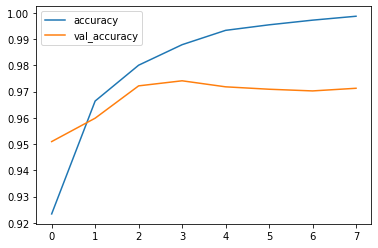

In [ ]:
losses[['accuracy','val_accuracy']].plot()

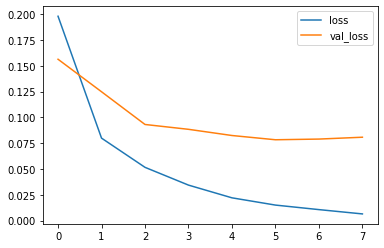

In [ ]:
losses[['loss','val_loss']].plot()

In [ ]:
print(model.metrics_names)
print(model.evaluate(data_test,Ytest,verbose=0))

['loss', 'accuracy']
[0.0807533860206604, 0.9712580442428589]


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

predictions = model.predict(data_test)

Category_Threshhold = 0.5
predictions = [1 if x>Category_Threshhold else 0 for x in predictions]

In [ ]:
print(classification_report(Ytest,predictions))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      9772
           1       0.83      0.90      0.87      1118

    accuracy                           0.97     10890
   macro avg       0.91      0.94      0.92     10890
weighted avg       0.97      0.97      0.97     10890



In [ ]:
 tn, fp, fn, tp = confusion_matrix(Ytest,predictions).ravel()
(tn, fp, fn, tp)

(9297, 475, 22, 1096)

In [ ]:
!head runtime_test_without_labels.csv

review
"This looked like the solution to all my makeup needs. I could just stick it in my purse and be done with it. Oh, don't do that. The blush with crumble and get into the lip gloss and then it's ruined. The eye shadow will leave powdery traces on everything in your purse. This tempting little disaster has to stay at home on your makeup table, and that just isn't the point, is it?"
"Just an average oil at best. Smells sweet and more faint than other peppmint oils I own. I purchased another oil with the peppermint and while both smell nice, they are not nearly as strong as other essentials oils used in my diffuser. I will likely pass on buying more Majestic Products as it seems the potency is just not there. I can put 5 drops in my diffuser and it not hold a candle to others oils with only 3 drops. Not a terrible oil but just not strong. I find it a much more pleasing smell than more pure forms so I think it would be a great one to use on the body. I plan on using it in my palms for

In [ ]:
runtime = pd.read_csv("runtime_test_without_labels.csv", encoding='latin-1')

In [ ]:
runtime.tail()

,review
198983,It does firm the under-eye area by shellacking...
198984,The product arrived in a skeptical package; th...
198985,"The first time i bought this soap,it worked ve..."
198986,I used it for 2 weeks now and find this lotion...
198987,It was cool to have a transparent purse and ha...


In [ ]:
sequences_runtime = tokenizer.texts_to_sequences(runtime['review'])

In [ ]:
data_runtime = pad_sequences(sequences_runtime, maxlen=T)
print('Shape of data test tensor:', data_runtime.shape)

Shape of data test tensor: (198988, 3382)


In [ ]:
predictions = model.predict(data_runtime)

predictions = [1 if x > Category_Threshhold else 0 for x in predictions]

In [ ]:
runtime['predict'] = predictions

In [ ]:
runtime.tail()

,review,predict
198983,It does firm the under-eye area by shellacking...,0
198984,The product arrived in a skeptical package; th...,0
198985,"The first time i bought this soap,it worked ve...",0
198986,I used it for 2 weeks now and find this lotion...,0
198987,It was cool to have a transparent purse and ha...,0


In [ ]:
compression_opts = dict(method='zip',
                        archive_name='runtime_test.csv')  
df.to_csv('runtime_test.zip', index=False,
          compression=compression_opts)  